In [1]:
#Import all dependencies
import pandas as pd
from sqlalchemy import create_engine

In [2]:
stroke_data_file = "C:/Users/DELL/Desktop/HealthCare-ETL-Project/HealthCare-ETL-Project/Data/healthcare-dataset-stroke-data.csv"

In [3]:
data_df = pd.read_csv(stroke_data_file)

In [4]:
#Finding Missing Values
data_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
#Finding Duplicate Rows
duplicate_rows = data_df[data_df.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [6]:
# Drop rows with missing values
df_cleaned = data_df.dropna().copy()

#Finding Missing Values
df_cleaned.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
# Verify the cleaning
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
!pip install sklearn
!pip install imblearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [10]:
# Copy the DataFrame to avoid modifying the original
df_transformed = df_cleaned.copy()

# 1. Label Encoding for Categorical Columns
label_encoders = {}
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    df_transformed[col] = le.fit_transform(df_transformed[col])
    label_encoders[col] = le

In [11]:
# 2. Age Binning
bins = [0, 18, 35, 55, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df_transformed['age_group'] = pd.cut(df_transformed['age'], bins=bins, labels=labels, right=False)

df_transformed['age_group'] = label_encoders['age_group'] = LabelEncoder().fit_transform(df_transformed['age_group'])

In [12]:
# 3. BMI Categories
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_transformed['bmi_category'] = pd.cut(df_transformed['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Label encode the bmi_category
df_transformed['bmi_category'] = label_encoders['bmi_category'] = LabelEncoder().fit_transform(df_transformed['bmi_category'])

In [13]:
# 4. Normalize Continuous Variables
scaler = StandardScaler()
df_transformed[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df_transformed[['age', 'avg_glucose_level', 'bmi']])


In [14]:
# 5. Handle Imbalanced Data with SMOTE
X = df_transformed.drop('stroke', axis=1)
y = df_transformed['stroke']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Combine X and y back into a DataFrame
df_balanced = pd.concat([X_res, y_res], axis=1)

# Check the transformed DataFrame
df_balanced.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group,bmi_category,stroke
0,9046,1,1.070138,0,1,1,2,1,2.777698,0.981345,1,0,1,1
1,31112,1,1.646563,0,1,1,2,0,0.013842,0.459269,2,0,1,1
2,60182,0,0.272012,0,0,1,2,1,1.484132,0.701207,3,2,1,1
3,1665,0,1.602222,1,0,1,3,0,1.549193,-0.623083,2,0,0,1
4,56669,1,1.690903,0,0,1,2,1,1.821368,0.013595,1,0,2,1


1. Bar Plots to Compare Stroke Occurrences Across Different age_group or bmi_category

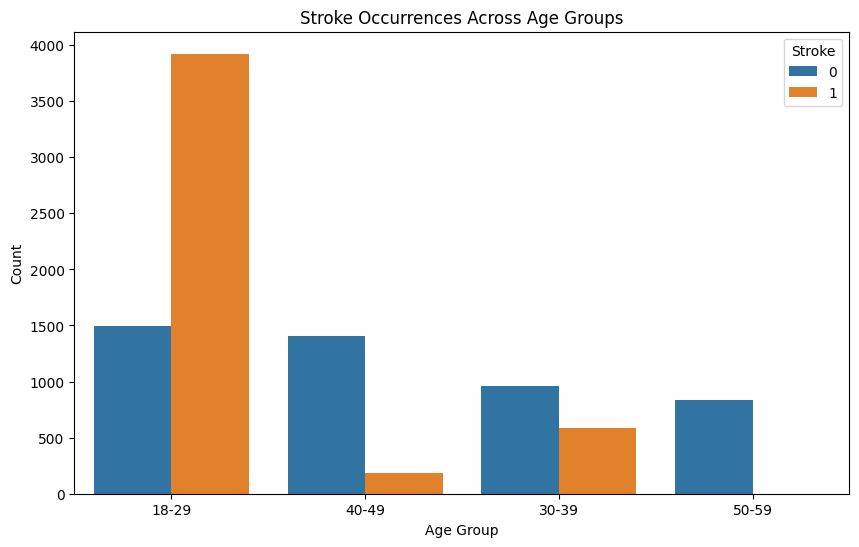

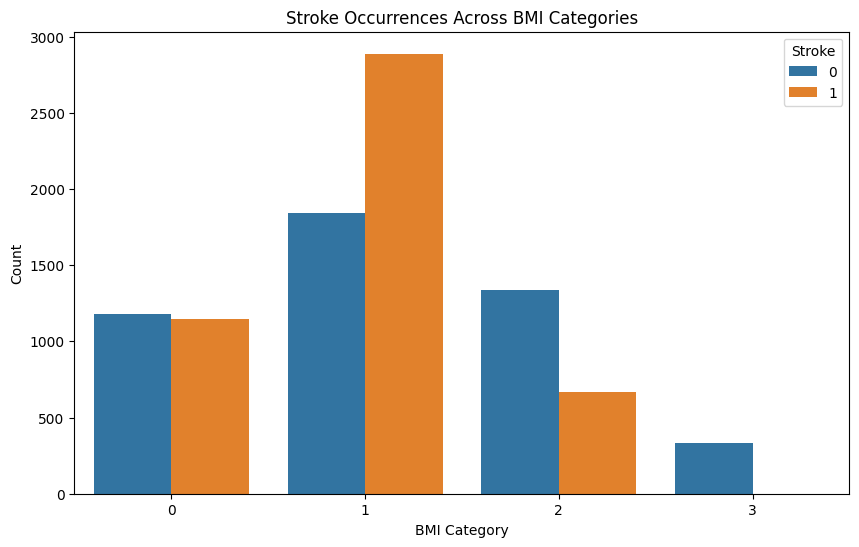

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming age_group was originally a numerical category, let's map it to meaningful labels.
# Adjust the labels according to how you categorized the age groups.

age_group_labels = {
    0: '18-29',
    1: '30-39',
    2: '40-49',
    3: '50-59',
    4: '60-69',
    5: '70-79',
    6: '80+'
}

# Map the labels
df_balanced['age_group'] = df_balanced['age_group'].map(age_group_labels)

# Bar plot for stroke occurrences across age_group
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='age_group', hue='stroke')
plt.title('Stroke Occurrences Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

# Bar plot for stroke occurrences across bmi_category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='bmi_category', hue='stroke')
plt.title('Stroke Occurrences Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()


2. Correlation Heatmap to Visualize the Relationship Between Features


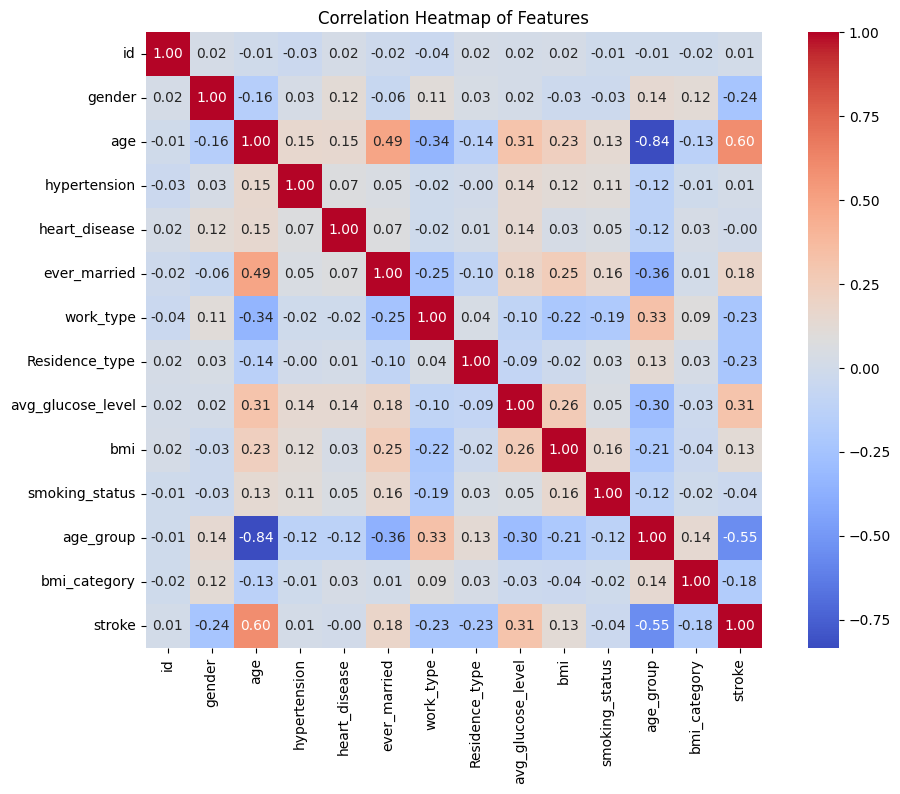

In [18]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe to avoid altering the original data
df_numeric = df_balanced.copy()

# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['gender', 'age_group', 'work_type', 'Residence_type', 'bmi_category', 'smoking_status']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()


3. Histograms to See the Distribution of avg_glucose_level and bmi

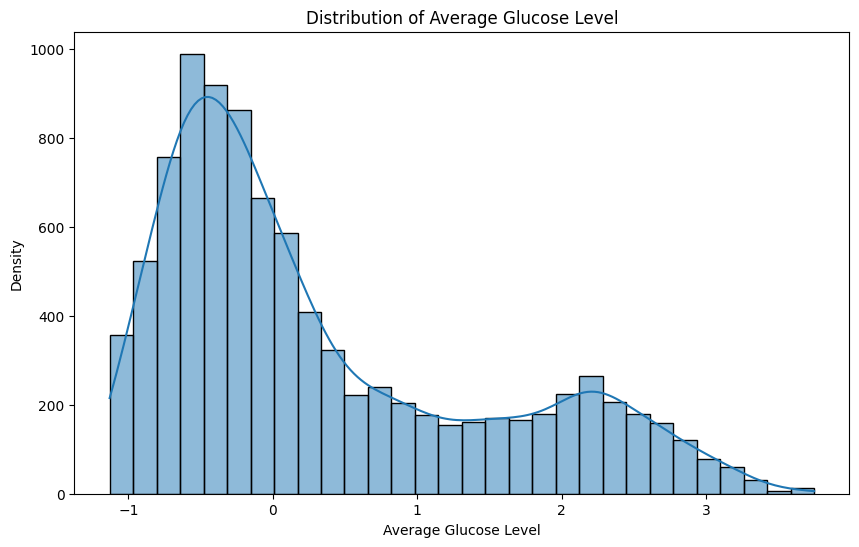

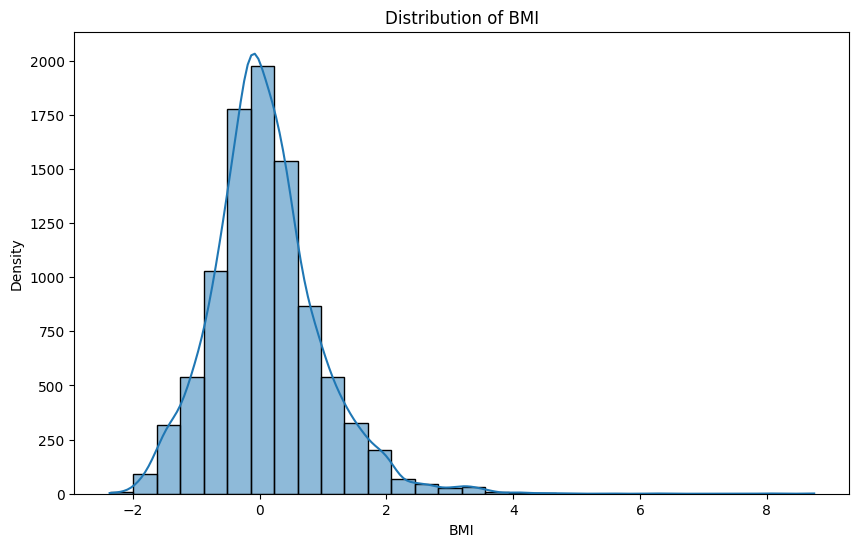

In [19]:
# Histogram for avg_glucose_level
plt.figure(figsize=(10, 6))
sns.histplot(data=df_balanced, x='avg_glucose_level', kde=True, bins=30)
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

# Histogram for bmi
plt.figure(figsize=(10, 6))
sns.histplot(data=df_balanced, x='bmi', kde=True, bins=30)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


Transforming avg_glucose_level to Categorical Levels

Transformation: Create a new column to categorize avg_glucose_level into low, normal, and high.

Visualization: Compare stroke occurrences across different glucose levels.

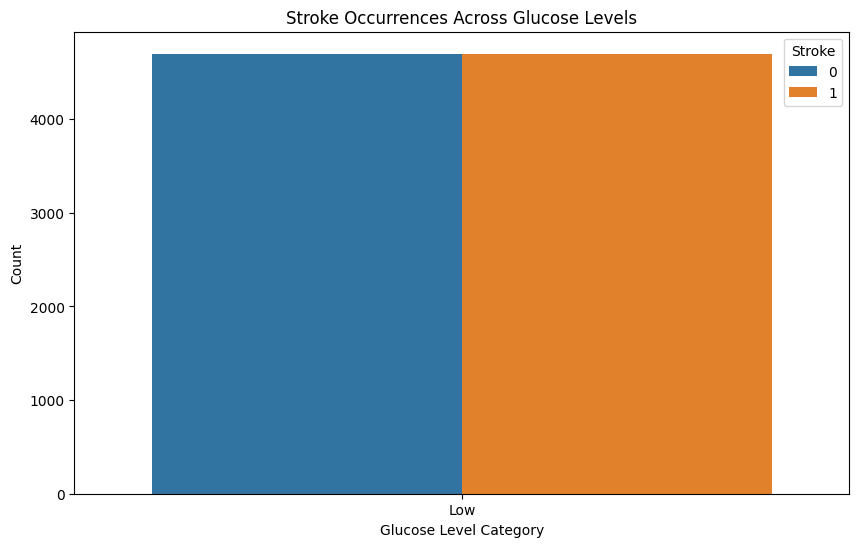

In [20]:
# Transformation: Categorize avg_glucose_level
def categorize_glucose_level(row):
    if row['avg_glucose_level'] < 70:
        return 'Low'
    elif 70 <= row['avg_glucose_level'] < 140:
        return 'Normal'
    else:
        return 'High'

df_balanced['glucose_level_category'] = df_balanced.apply(categorize_glucose_level, axis=1)

# Visualization: Stroke occurrences across glucose_level_category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='glucose_level_category', hue='stroke')
plt.title('Stroke Occurrences Across Glucose Levels')
plt.xlabel('Glucose Level Category')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()


Calculating Age-Adjusted Stroke Rates

Transformation: Create a new column for age-adjusted stroke rates.

Visualization: Compare the stroke rates across different work types

C:\Users\DELL\AppData\Local\Temp\ipykernel_17812\3952879792.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_balanced, x='work_type', y='age_adjusted_stroke_rate', ci=None)


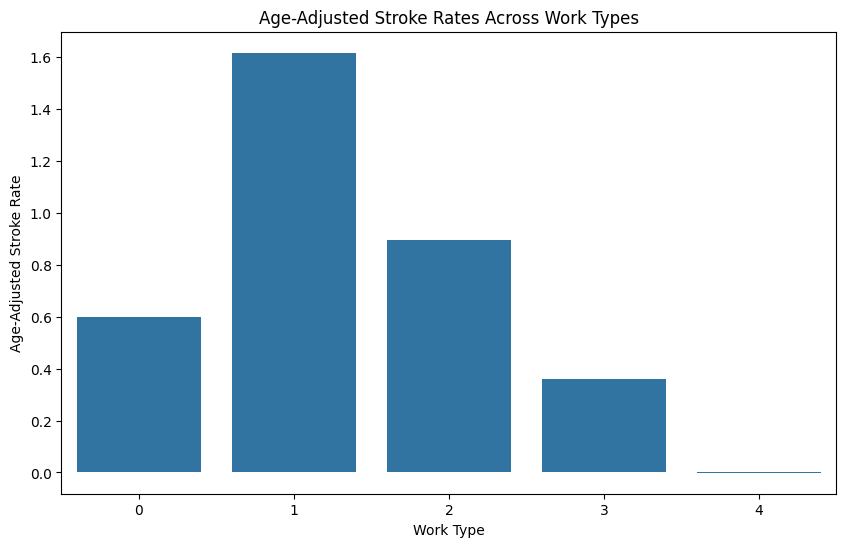

In [21]:
# Transformation: Calculate age-adjusted stroke rate
# Assuming a simplistic adjustment by dividing stroke occurrences by age
df_balanced['age_adjusted_stroke_rate'] = df_balanced['stroke'] / df_balanced['age']

# Visualization: Age-adjusted stroke rates across work types
plt.figure(figsize=(10, 6))
sns.barplot(data=df_balanced, x='work_type', y='age_adjusted_stroke_rate', ci=None)
plt.title('Age-Adjusted Stroke Rates Across Work Types')
plt.xlabel('Work Type')
plt.ylabel('Age-Adjusted Stroke Rate')
plt.show()


Creating a Risk Score

Transformation: Calculate a simple risk score based on hypertension, heart disease, and smoking status.

Visualization: Compare the average risk scores between individuals with and without stroke.

C:\Users\DELL\AppData\Local\Temp\ipykernel_17812\388456834.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_balanced, x='stroke', y='risk_score', ci=None)


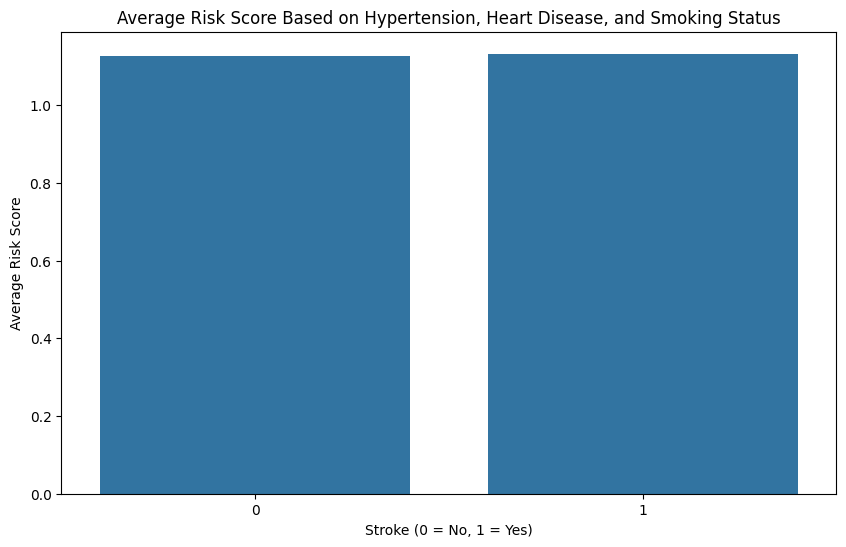

In [22]:
# Transformation: Calculate a risk score
df_balanced['risk_score'] = df_balanced['hypertension'] + df_balanced['heart_disease'] + df_balanced['smoking_status'].apply(lambda x: 1 if x != 'never smoked' else 0)

# Visualization: Average risk score between individuals with and without stroke
plt.figure(figsize=(10, 6))
sns.barplot(data=df_balanced, x='stroke', y='risk_score', ci=None)
plt.title('Average Risk Score Based on Hypertension, Heart Disease, and Smoking Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Risk Score')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_17812\1354009668.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=stroke_by_residence, x='Residence_type', y='stroke', ci=None)


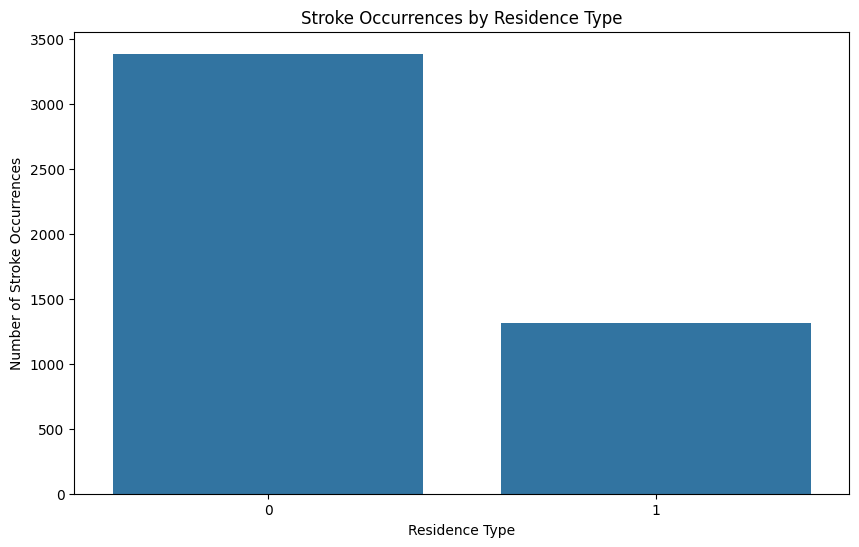

In [23]:
# Transformation: Aggregate stroke occurrences by Residence_type
stroke_by_residence = df_balanced.groupby('Residence_type')['stroke'].sum().reset_index()

# Visualization: Stroke occurrences by Residence_type
plt.figure(figsize=(10, 6))
sns.barplot(data=stroke_by_residence, x='Residence_type', y='stroke', ci=None)
plt.title('Stroke Occurrences by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Stroke Occurrences')
plt.show()
